
# **Reto 01:**

**Dr. Antonio Arista Jalife**

Para este reto vamos a crear algunas funciones útiles, para que puedas usarlas a tu conveniencia y puedas jugar con el Adivina quien. Primero, vamos a importar NumPy, ya que lo usaremos mucho

In [1]:
import numpy as np

Las salidas (los nombres de sospechosos) y la matriz de características serán la misma del ejemplo 01, sientete libre de editar todo esto (y colocar tus propias características!):

In [2]:
#Para las salidas, utilizaremos la variable Y
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

Las características (matrices) son las mismas del ejemplo 01:

In [3]:
#Características:
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

Crearé las funciones para que puedas probar constantemente diferentes preguntas:

In [4]:
def mostrarSospechosos(nombres, sospechosos):
    print("Sospechosos que quedan:")
    for contador in range(len(sospechosos)):
        if(sospechosos[contador] == True):
            print(nombres[contador])

In [5]:
#Por ejemplo, vamos a imprimir a todos como sospechosos.
sospechosos = [True]*len(y)
mostrarSospechosos(y, sospechosos)

Sospechosos que quedan:
Antonio
Elly
Patricia
María
Juana
José
Luis


Con esta función puedes hacer una decisión del árbol:

In [6]:
def descartarSospechosos(caracteristica, valorQueBuscas, sospechosos):
    respuesta = np.where(x[:,caracteristica] == valorQueBuscas, True, False)
    for contador in range(len(sospechosos)):
        respuesta[contador] = sospechosos[contador] and respuesta[contador]
    return respuesta

Por ejemplo, veamos como descartamos a aquellos que tienen cabello largo (la característica en la columna 0)

In [7]:
sospechosos = descartarSospechosos(caracteristica = 0, valorQueBuscas = 1, sospechosos = sospechosos)
mostrarSospechosos(y,sospechosos)

Sospechosos que quedan:
Elly
María
José


Reiniciaré los sospechosos a Todos en True, a partir de ahora, se creativo y elige con "descartarSospechosos" y ve cuantos quedan con "mostrarSospechosos"!

In [8]:
sospechosos = [True]*len(y)

# **Reto 02**

**Dr. Antonio Arista Jalife**

En este ejemplo vamos a editar un poco los resultados que obtenemos de los árboles de decisión, y buscaremos alguna posible falla. Tomando como base el código del Ejemplo 02, vamos a construir un árbol de decisión.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

In [10]:
#Para las salidas, utilizaremos la variable Y
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

#Características:
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)

In [11]:
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(x, y)

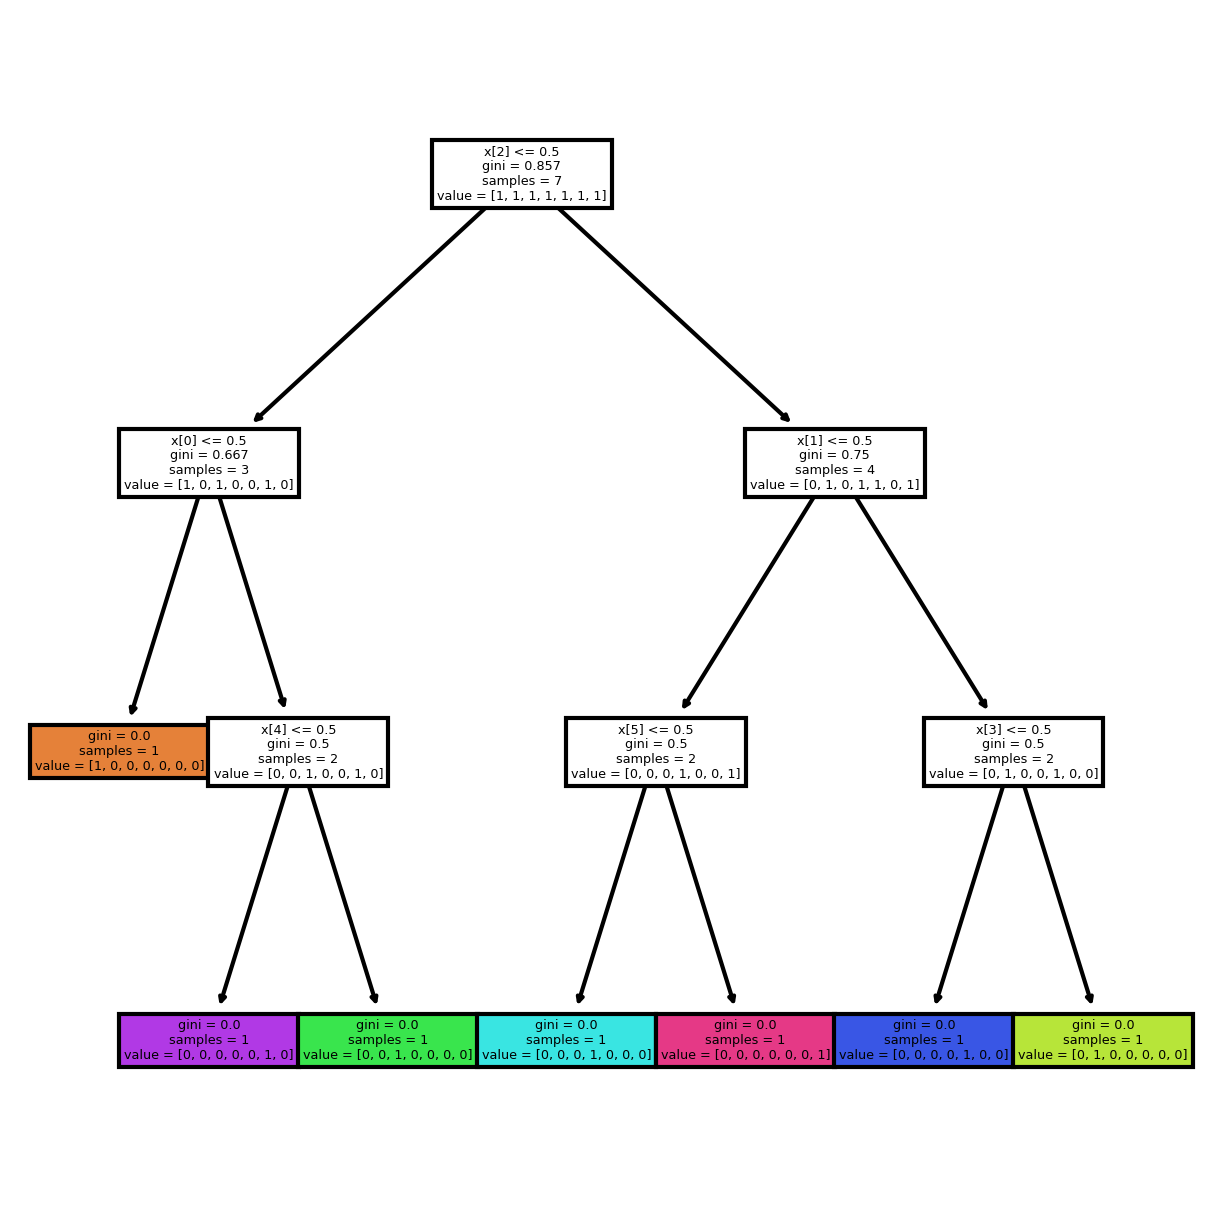

In [12]:
plt.figure(figsize = (5,5), dpi = 300)
tree.plot_tree(arbol,filled = True);
plt.show()

Ahora, veamos que sucede si jugamos un poco con los posibles resultados y algunas variaciones:

In [13]:
#Este sospechoso es José: Es exactamente igual a los datos del adivina quien.
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['José']


In [14]:
#Este sospechoso es José pero con lentes.
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['José']


In [15]:
#Este sospechoso es José pero con lentes y sombrero.
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['Luis']


In [16]:
#Este sospechoso es José pero con sombrero.
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['Patricia']


¿Que sucedió aqui? Modificamos un poquito al sospechoso y se inclinó a ser mas de una clase que de otra. Esto puede ser un error grave de clasificación, sobre todo si utilizamos valores que no son absolutos (1 o 0) como estatura, peso o edad. Tenemos que ver una manera de evitar eso.

# **Reto 03**

**Dr. Antonio Arista Jalife**

Esta es la solución al reto 03, y si no lo has resuelto, te invito a intentar con el otro cuaderno! No te rindas!

Para comenzar con la solución, añadiremos las librerías que necesitamos.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.metrics import confusion_matrix

Hacemos 1000 blobs aleatorios, con 10 características cada uno, pero solo 2 clases (o centers). Una vez generados, vamos a separarlos en entrenamiento y pruebas. 60% entrenamiento, 40% pruebas.

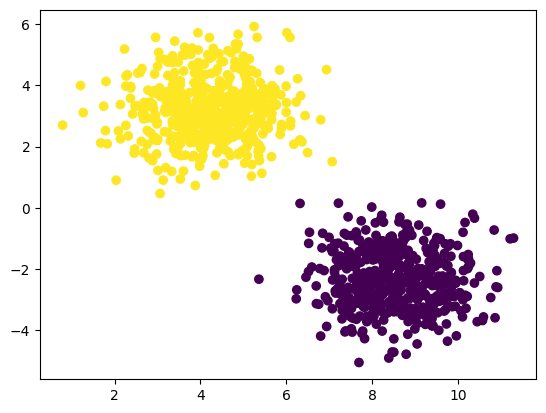

In [18]:
x, y = make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_entrenamiento, x_pruebas, y_entrenamiento, y_pruebas = train_test_split(x, y, test_size =0.40)

Vamos a generar un bosque de 800 árboles de decisión, y los vamos a entrenar con los datos de entrenamiento. Una vez entrenado el bosque, haremos que trate de predecir los datos con las entradas de prueba (x_pruebas)

In [19]:
bosque = forest(n_estimators = 800)
bosque.fit(x_entrenamiento, y_entrenamiento)
y_predichos = bosque.predict(x_pruebas)


Utilizando lo aprendido de la sesión 2, vamos a generar una matriz de confusión, y vamos a buscar los TP, TN, FP, y FN

In [20]:
resultado = confusion_matrix(y_pruebas, y_predichos)
print(resultado)

[[192   0]
 [  0 208]]


In [21]:
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

True positives: 208
True negatives: 192
False positives: 0
False negative: 0


Y recordando la sesión 02, vamos a calcular la accuracy, sensibilidad y especificidad.

In [22]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

Precision:100.0%
Sensibilidad:100.0%
Especificidad:100.0%
